In [1]:
%load_ext autoreload
%autoreload 2

from quantumnetworks import animate_evolution, MultiModeSystem
import numpy as np
import matplotlib.pyplot as plt

### Lattice Geometry Functions

In [2]:
def add_line(pos, n, start_point, end_point, N=20):
    start_point = np.array(start_point)
    end_point = np.array(end_point)
    for i in range(0,N):
        pos[n] = np.array(end_point - start_point)*i/N + start_point
        n += 1
    return n

def gen_lattice_geometry():
    pos = {}
    n = 0

    # M
    n = add_line(pos, n, [0,0], [0,20], N=20)
    n = add_line(pos, n, [0,20], [10,10], N=20)
    n = add_line(pos, n, [10,10], [20,20], N=20)
    n = add_line(pos, n, [20,20], [20,0], N=20)
    pos[n] = np.array([20,0])
    n+=1



    # I
    n = add_line(pos, n, [40,0], [40,20], N=20)
    pos[n] = np.array([40,20])
    n+=1

    # T
    n = add_line(pos, n, [60,0], [60,20], N=20)
    n = add_line(pos, n, [50,20], [70,20], N=20)
    pos[n] = np.array([70,20])
    n += 1

    return pos, n

def gen_couplings():
    g = 2

    q = lambda val : [k for k, v in pos.items() if np.all(v == val)][0]

    couplings = []
    for i in range(0,80):
        couplings.append([i,i+1, 2*np.pi*g])

    for i in range(81,101):
        couplings.append([i,i+1, 2*np.pi*g])

    for i in range(102,121):
        couplings.append([i,i+1, 2*np.pi*g])

    for i in range(122,142):
        couplings.append([i,i+1, 2*np.pi*g])

    couplings.append([q(np.array([60,19])),q(np.array([60,20])), 2*np.pi*g])
    couplings.append([q(np.array([20,10])),q(np.array([40,10])), 2*np.pi*g])
    couplings.append([q(np.array([40,10])),q(np.array([60,10])), 2*np.pi*g])
    
    return couplings

gaussian_pulse_drive_gen = lambda amp, a, w, t0, t: amp*np.exp(1j*w*t) * np.exp(-a*(t-t0)**2)

# Pulse Drive

In [3]:
# lattice geometry
pos, N =  gen_lattice_geometry()

# gaussian pulse driving nodes 0, 81, 102
kappas = np.zeros(N)
kappas[0], kappas[81], kappas[102] = 2*np.pi*0.1, 2*np.pi*0.1, 2*np.pi*0.1
pulse_drive = lambda t: gaussian_pulse_drive_gen(100, 5, 2*np.pi*1, 2, t) # amp, scale, w_drive, t0,  t 

# set up solver
system = MultiModeSystem(params={"omegas":[2*np.pi*1]*N, 
                                 "kappas":kappas, 
                                 "gammas":np.zeros(N), 
                                 "kerrs":np.zeros(N), 
                                 "drives": {0: pulse_drive, 81: pulse_drive, 102: pulse_drive}, 
                                 "couplings":gen_couplings()})

# no excitations initially
initial_state = np.array([0,0]*N)
times = np.linspace(0, 30, 1001)

In [4]:
state_dynamics = system.trapezoidal(initial_state, times)

In [6]:
fig, ax = plt.subplots(1, figsize=(6, 3), dpi=200)
system.animate_networkx(state_dynamics, times, ax=ax, pos=pos, animation_time=10, num_frames=54, with_edge_labels=False, with_node_labels=False, save_animation="mit.gif", node_size=50, width=1, linewidths=.1)

(<Figure size 1200x600 with 1 Axes>,
 <AxesSubplot:title={'center':'t = 29.46 ns'}>)

# Extras

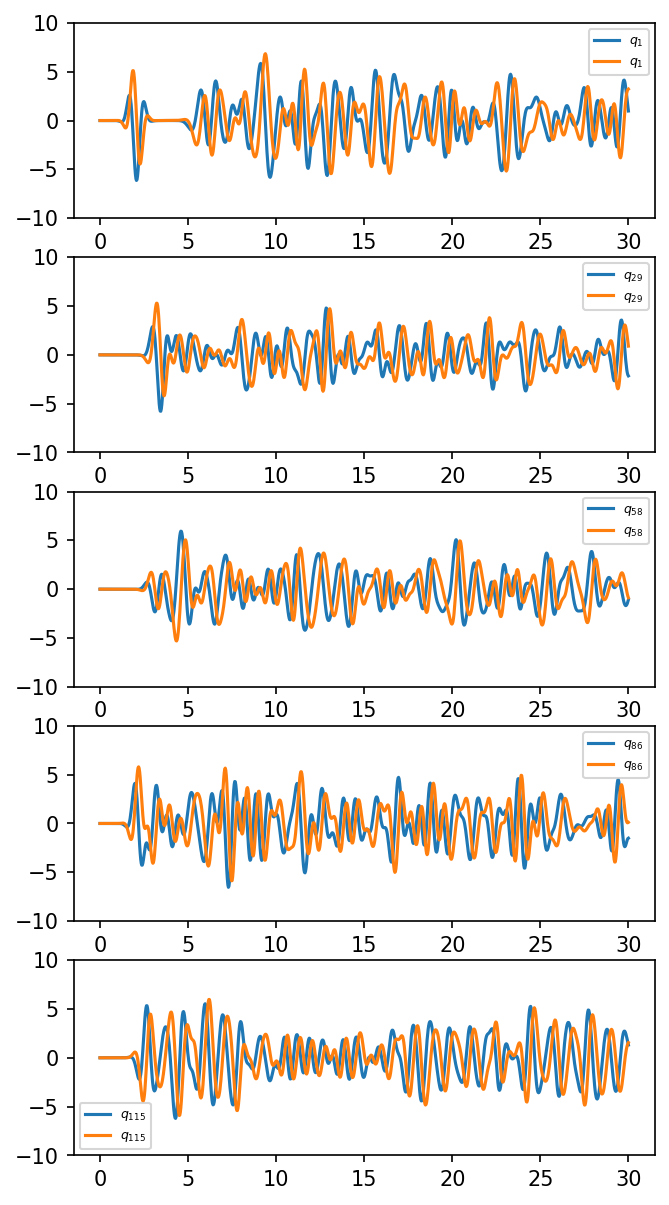

In [7]:
from quantumnetworks import plot_full_evolution

num_plots = 5
fig, axs = plt.subplots(num_plots,1, figsize=(5,2*num_plots), dpi=150)

ylim = np.array([-10,10])
for j in range(0,num_plots):
    i = j*N//num_plots
    ax = axs[j]
    labels = ["$q_{" + str(i+1) + "}$","$p_{" + str(i+1) + "}$"]
    ax.plot(times, state_dynamics[2*i,:], label=labels[0])
    ax.plot(times, state_dynamics[2*i+1,:], label=labels[0])
    ax.legend(fontsize=6)
    ax.set_xlabel(None)
    ax.set_ylim(*ylim)